MNIST database(Modified National Institute of Standards and Technology database) is a large handwritten digits commonly used.

# Importing required libraries

In [9]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D ,MaxPooling2D , Dense, Flatten , Dropout, Activation
from keras.utils import np_utils #this is numpy utils to perform one hot encoding using function np_categorical
# conv2D is for images conv1D is for Time Series conv3D is for both image and time series

# Loading dataset
MNIST dataset is preloaded in keras

In [2]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Preprocessing

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

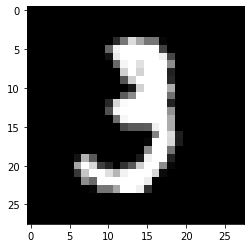

In [7]:
plt.imshow(x_train[10],cmap="gray") # colourmap (cmap)

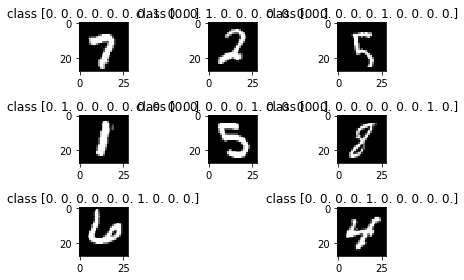

In [30]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = rd.randint(0, len(x_train))
    plt.imshow(x_train[num],cmap="gray",interpolation = "none")
    plt.title("class {}".format(y_train[num]))
    plt.tight_layout()

In [11]:
#x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)


In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
# as this is array it is done element wise division with the 255 in each pixel
x_train=x_train/255
x_test=x_test/255

using one hot encoding to form output for y variables
this is in 10 classes

In [15]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
# conv2d is conv_layaer("filters","filter shape","stride","padding","input_dim")
#maxpoling2D will have two things (pool_size,strides,padding)
model=Sequential()
model.add(Conv2D(20,(5,5),padding="valid",activation="relu",input_shape=(28,28,1),kernel_initializer="he_uniform"))
model.add(MaxPooling2D(pool_size=(2,2))) # here internally it willhave (2,2,20) this 20 is coming from feature map 
#that is from filters

model.add(Conv2D(20,(5,5),padding="valid",activation="relu",kernel_initializer="he_uniform"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # converts the output to array by flatten 
model.add(Dense(120,activation="relu")) # 120 is neurons 
model.add(Dense(10,activation="softmax")) 

In [20]:
model.summary()
# shape is (28,28) and filters 20 , each filter will have one bias and filter size is (5,5) ,so for each filter it is 25
#25 multiplied by 20 filters is 500 adding bias 20 gives 520 parameters 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 20)          10020     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [24]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [26]:
save=model.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
6000/6000 [==============================] - 103s 17ms/step - loss: 0.0694 - accuracy: 0.9788
Epoch 2/10
6000/6000 [==============================] - 115s 19ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 3/10
6000/6000 [==============================] - 106s 18ms/step - loss: 0.0282 - accuracy: 0.9906
Epoch 4/10
6000/6000 [==============================] - 103s 17ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 5/10
6000/6000 [==============================] - 103s 17ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 6/10
6000/6000 [==============================] - 96s 16ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 7/10
6000/6000 [==============================] - 101s 17ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 8/10
6000/6000 [==============================] - 163s 27ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 9/10
6000/6000 [==============================] - 137s 23ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 10/10
6000/6000 [==============================] -

In [53]:
#pred=model.predict(x_train)

1875/1875 [==============================] - 30s 12ms/step


In [27]:
model.evaluate(x_test,y_test) # internally will take x_test and compare with y_test and predict the value

313/313 [==============================] - 16s 19ms/step - loss: 0.0447 - accuracy: 0.9890


[0.04471523314714432, 0.9890000224113464]